In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/home/jayesh/Desktop/cardio_train.csv") 
df.head()
np.isnan(df).sum()
print(type(df))
df.columns 

<class 'pandas.core.frame.DataFrame'>


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [25]:
duplicates = len(df) - len(df.drop(['id'],axis=1).drop_duplicates())
df.drop(['id'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
print(f'{duplicates} duplicate records dropped.')

24 duplicate records dropped.


In [39]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,69976.0,19468.95,2467.37,10798.0,17664.0,19703.0,21327.0,23713.0
gender,69976.0,1.35,0.48,1.0,1.0,1.0,2.0,2.0
height,69976.0,164.36,8.21,55.0,159.0,165.0,170.0,250.0
weight,69976.0,74.21,14.40,10.0,65.0,72.0,82.0,200.0
ap_hi,69976.0,128.82,154.04,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69976.0,96.64,188.50,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69976.0,1.37,0.68,1.0,1.0,1.0,2.0,3.0
gluc,69976.0,1.23,0.57,1.0,1.0,1.0,1.0,3.0
smoke,69976.0,0.09,0.28,0.0,0.0,0.0,0.0,1.0
alco,69976.0,0.05,0.23,0.0,0.0,0.0,0.0,1.0


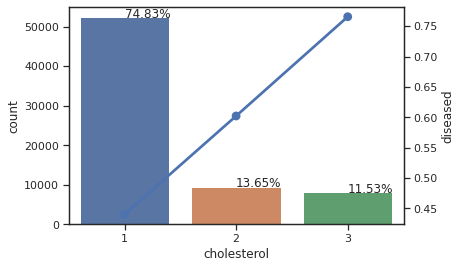

In [41]:
tmp = pd.crosstab(df['cholesterol'],df['cardio'],normalize='index')
tmp.reset_index()
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1)
sns.countplot(df['cholesterol'],order=list(tmp.index), ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],order=list(tmp.index),ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(df['cholesterol'])*100,'%'))
plt.show()

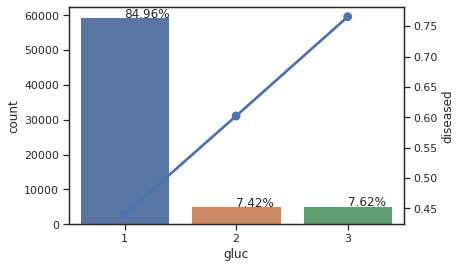

In [43]:
mp = pd.crosstab(df['gluc'],df['cardio'],normalize='index')
tmp.reset_index()
tmp.columns = ['not diseased','diseased']
fig, ax = plt.subplots(1,1)
sns.countplot(df['gluc'],order=list(tmp.index), ax=ax)
plot2 = ax.twinx()
sns.pointplot(tmp.index,tmp['diseased'],order=list(tmp.index),ax=plot2)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x()+patch.get_width()/2,height,'{:.2f}{}'.format(height/len(df['gluc'])*100,'%'))
plt.show()

No handles with labels found to put in legend.


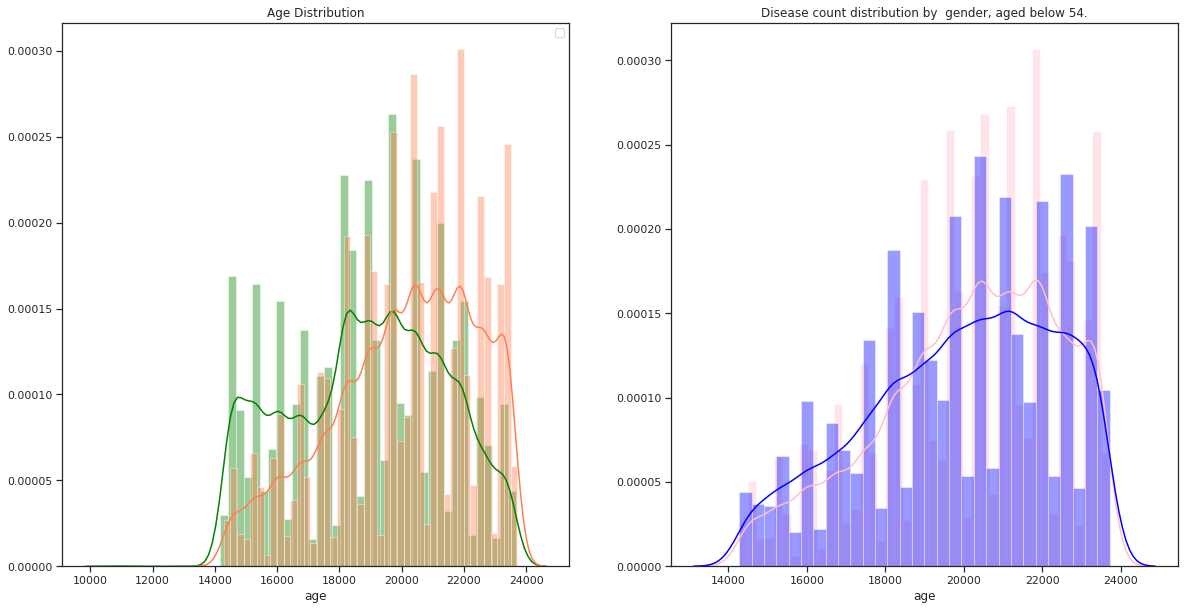

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(df['age'][df['cardio']==0], ax = ax1, color='green')
sns.distplot(df['age'][df['cardio']==1], ax = ax1,color='coral')
ax1.set_title('Age Distribution')
ax1.legend()

sns.distplot(df['age'][(df['gender']==1) & (df['cardio']==1)],ax = ax2,color='pink')
sns.distplot(df['age'][(df['gender']==2) & (df['cardio']==1)],ax = ax2,color='blue')
ax2.set_title('Disease count distribution by  gender, aged below 54.')
plt.show()

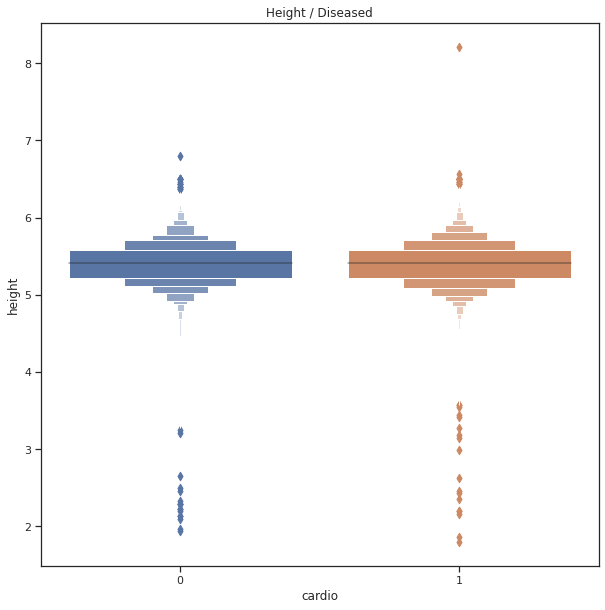

In [27]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,10))
sns.boxenplot(df['cardio'],(df['height']*0.0328084),ax=ax1)
ax1.set_title('Height / Diseased')
plt.show()



In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

/home/jayesh/anaconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [33]:
df.corr()
##
X =df.drop('cardio', axis = 1) 
y=df['cardio']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=y)

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50)

In [36]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
y_pred =  clf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.796337504848621
Accuracy Score on test data:  0.6930405373219645


In [ ]:
#after feature engineering
                                             

In [44]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

In [45]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
y_pred =  clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9997754322928363
Accuracy Score on test data:  0.6384032772829038


In [53]:
from  xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(f'Train Score: {xgb.score(X,y)}')

y_pred = xgb.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test,y_pred)}')

Train Score: 0.7576168972219046
Test Accuracy: 0.7313390177678274
